## ChatNS part 1

In [123]:
def find_regions(grid):
    rows, cols = len(grid), len(grid[0])
    visited = [[False] * cols for _ in range(rows)]
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    
    def dfs(r, c, plant_type):
        stack = [(r, c)]
        region_plots = []
        while stack:
            x, y = stack.pop()
            if visited[x][y]:
                continue
            visited[x][y] = True
            region_plots.append((x, y))
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx][ny] and grid[nx][ny] == plant_type:
                    stack.append((nx, ny))
        return region_plots
    
    regions = []
    for i in range(rows):
        for j in range(cols):
            if not visited[i][j]:
                plant_type = grid[i][j]
                region_plots = dfs(i, j, plant_type)
                if region_plots:
                    regions.append(region_plots)
    
    return regions

def calculate_area(region):
    return len(region)

def calculate_perimeter(region, grid):
    perimeter = 0
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for x, y in region:
        # Check each side of the garden plot
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx < 0 or nx >= len(grid) or ny < 0 or ny >= len(grid[0]) or grid[nx][ny] != grid[x][y]:
                perimeter += 1
    return perimeter

def total_fence_cost(grid):
    regions = find_regions(grid)
    total_cost = 0
    
    for region in regions:
        if not region:
            continue
        area = calculate_area(region)
        perimeter = calculate_perimeter(region, grid)
        total_cost += area * perimeter
    
    return total_cost

if __name__ == "__main__":
    map_grid = [
        list("RRRRIICCFF"),
        list("RRRRIICCCF"),
        list("VVRRRCCFFF"),
        list("VVRCCCJFFF"),
        list("VVVVCJJCFE"),
        list("VVIVCCJJEE"),
        list("VVIIICJJEE"),
        list("MIIIIIJJEE"),
        list("MIIISIJEEE"),
        list("MMMISSJEEE"),
    ]
    
    print("Total cost of fencing all regions:", total_fence_cost(map_grid))

Total cost of fencing all regions: 1930


In [124]:
with open('./data/Day 12/input.txt') as f:
    map_grid = [list(line.strip()) for line in f.readlines()]
print("Total cost of fencing all regions:", total_fence_cost(map_grid))

Total cost of fencing all regions: 1361494


## ChatNS part 2

In [3]:
def parse_map(map_input):
    return [list(row.strip()) for row in map_input.strip().split("\n")]


def find_region_counts(garden_map):
    rows, cols = len(garden_map), len(garden_map[0])
    visited = [[False] * cols for _ in range(rows)]
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    def dfs(r, c, plant_type):
        stack = [(r, c)]
        area = 0
        sides = set()

        while stack:
            cr, cc = stack.pop()
            if visited[cr][cc]:
                continue
            visited[cr][cc] = True
            area += 1

            # Check all four directions
            for i, (dr, dc) in enumerate(directions):
                nr, nc = cr + dr, cc + dc
                if 0 <= nr < rows and 0 <= nc < cols:
                    if garden_map[nr][nc] == plant_type:
                        if not visited[nr][nc]:
                            stack.append((nr, nc))
                    else:
                        sides.add((cr, cc, i))
                else:
                    sides.add((cr, cc, i))

        return area, len(set((r, c) for r, c, _ in sides))

    region_details = {}

    for r in range(rows):
        for c in range(cols):
            if not visited[r][c]:
                plant_type = garden_map[r][c]
                area, num_sides = dfs(r, c, plant_type)

                if plant_type not in region_details:
                    region_details[plant_type] = []
                region_details[plant_type].append((area, num_sides))

    return region_details


def calculate_total_price(region_details):
    total_price = 0
    for plant_type, regions in region_details.items():
        for area, num_sides in regions:
            total_price += area * num_sides
            print(
                f"A region of {plant_type} plants with price {area} * {num_sides} = {area * num_sides}."
            )
    return total_price


# Example map
map_data = """
RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE
"""

# Parse the map and compute the necessary values
garden_map = parse_map(map_data)
region_details = find_region_counts(garden_map)
price = calculate_total_price(region_details)

# Output the total price
print(price)

A region of R plants with price 12 * 11 = 132.
A region of I plants with price 4 * 4 = 16.
A region of I plants with price 14 * 12 = 168.
A region of C plants with price 14 * 14 = 196.
A region of C plants with price 1 * 1 = 1.
A region of F plants with price 10 * 9 = 90.
A region of V plants with price 13 * 12 = 156.
A region of J plants with price 11 * 11 = 121.
A region of E plants with price 13 * 12 = 156.
A region of M plants with price 5 * 5 = 25.
A region of S plants with price 3 * 3 = 9.
1070


In [31]:
def parse_map(map_input):
    return [list(row.strip()) for row in map_input.strip().splitlines()]


def find_region_sides(garden_map):
    rows, cols = len(garden_map), len(garden_map[0])
    visited = [[False] * cols for _ in range(rows)]
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    def find_edges(r, c, plant_type):
        # Perform a boundary walker ("flood-fill border trace") to collect unique edges
        stack = [(r, c)]
        edge_points = set()
        boundary_directions = {}

        while stack:
            cr, cc = stack.pop()
            if (cr, cc) in edge_points:
                continue
            edge_points.add((cr, cc))
            current_dirs = []

            for i, (dr, dc) in enumerate(directions):
                nr, nc = cr + dr, cc + dc
                if (
                    not (0 <= nr < rows and 0 <= nc < cols)
                    or garden_map[nr][nc] != plant_type
                ):
                    current_dirs.append(i)

            if current_dirs:
                boundary_directions[(cr, cc)] = set(current_dirs)

            for i, (dr, dc) in enumerate(directions):
                nr, nc = cr + dr, cc + dc
                if (
                    0 <= nr < rows
                    and 0 <= nc < cols
                    and not visited[nr][nc]
                    and garden_map[nr][nc] == plant_type
                ):
                    stack.append((nr, nc))
                    visited[nr][nc] = True

        return edge_points, boundary_directions

    def count_sides(boundary_directions):
        # Calculate the number of distinct straight segments (sides)
        distinct_sides = 0
        for directions in boundary_directions.values():
            distinct_sides += len(directions)
        return distinct_sides // 2  # each direction only contributes if changing

    region_details = {}

    for r in range(rows):
        for c in range(cols):
            if not visited[r][c]:
                plant_type = garden_map[r][c]
                visited[r][c] = True
                edge_points, boundary_directions = find_edges(r, c, plant_type)
                area = len(edge_points)
                num_sides = count_sides(boundary_directions)

                if plant_type not in region_details:
                    region_details[plant_type] = []
                region_details[plant_type].append((area, num_sides))

    return region_details


def calculate_total_price(region_details):
    total_price = 0
    for plant_type, regions in region_details.items():
        for area, num_sides in regions:
            print(
                f"A region of {plant_type} plants with price {area} * {num_sides} = {area * num_sides}."
            )
            # Invoice calculation per region
            total_price += area * num_sides
    return total_price


# Example map
map_data = """
RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE
"""

# Parse the map and compute the necessary values
garden_map = parse_map(map_data)
region_details = find_region_sides(garden_map)
price = calculate_total_price(region_details)

# Output the total price
print(price)

A region of R plants with price 12 * 9 = 108.
A region of I plants with price 4 * 4 = 16.
A region of I plants with price 14 * 11 = 154.
A region of C plants with price 14 * 14 = 196.
A region of C plants with price 1 * 2 = 2.
A region of F plants with price 10 * 9 = 90.
A region of V plants with price 13 * 10 = 130.
A region of J plants with price 11 * 10 = 110.
A region of E plants with price 13 * 9 = 117.
A region of M plants with price 5 * 6 = 30.
A region of S plants with price 3 * 4 = 12.
965


In [30]:
def parse_map(map_input):
    return [list(row.strip()) for row in map_input.strip().splitlines()]


def find_region_sides(garden_map):
    # Dimensions
    rows, cols = len(garden_map), len(garden_map[0])
    visited = [[False] * cols for _ in range(rows)]
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    direction_labels = ["R", "D", "L", "U"]  # Right, Down, Left, Up

    def turn_count(boundary_directions):
        # Count distinct sides
        distinct_sides = 0
        for _, dir_changes in boundary_directions.items():
            distinct_sides += len(dir_changes)
        return distinct_sides

    def bfs(r, c, plant_type):
        # Use BFS to explore the component and collect boundary transitions
        from collections import deque

        queue = deque([(r, c)])
        edge_directions = {}
        visited[r][c] = True

        while queue:
            cr, cc = queue.popleft()
            current_directions = set()
            for i, (dr, dc) in enumerate(directions):
                nr, nc = cr + dr, cc + dc
                if 0 <= nr < rows and 0 <= nc < cols:
                    if garden_map[nr][nc] != plant_type:
                        current_directions.add(direction_labels[i])
                    elif not visited[nr][nc]:
                        visited[nr][nc] = True
                        queue.append((nr, nc))

            if current_directions:
                edge_directions[(cr, cc)] = current_directions

        return edge_directions

    region_details = {}

    for r in range(rows):
        for c in range(cols):
            if not visited[r][c]:
                plant_type = garden_map[r][c]
                boundary_directions = bfs(r, c, plant_type)

                # Calculate distinct sides throught direction shifts
                num_sides = turn_count(boundary_directions)
                area = len(boundary_directions)

                if plant_type not in region_details:
                    region_details[plant_type] = []
                region_details[plant_type].append((area, num_sides))

    return region_details


def calculate_total_price(region_details):
    total_price = 0
    for plant_type, regions in region_details.items():
        for area, num_sides in regions:
            print(
                f"A region of {plant_type} plants with price {area} * {num_sides} = {area * num_sides}."
            )
            total_price += area * num_sides
    return total_price


# Example map
map_data = """
RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE
"""

# Parse the map and compute the necessary values
garden_map = parse_map(map_data)
region_details = find_region_sides(garden_map)
price = calculate_total_price(region_details)

# Output the total price
print(price)

A region of R plants with price 8 * 12 = 96.
A region of I plants with price 4 * 6 = 24.
A region of I plants with price 12 * 21 = 252.
A region of C plants with price 14 * 26 = 364.
A region of C plants with price 1 * 4 = 4.
A region of F plants with price 7 * 12 = 84.
A region of V plants with price 9 * 15 = 135.
A region of J plants with price 11 * 19 = 209.
A region of E plants with price 6 * 9 = 54.
A region of M plants with price 4 * 6 = 24.
A region of S plants with price 3 * 6 = 18.
1264


## Part 2

Failure of the LLM unable to explain with the exercise however building it up by giving own example and making really small steps it can still do something

In [3]:
def parse_map(map_input):
    return [list(row.strip()) for row in map_input.strip().splitlines()]


example = """
RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE
"""

In [128]:
def find_regions(grid):
    rows, cols = len(grid), len(grid[0])
    visited = [[False] * cols for _ in range(rows)]
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    def dfs(r, c, plant_type):
        stack = [(r, c)]
        region_plots = []
        while stack:
            x, y = stack.pop()
            if visited[x][y]:
                continue
            visited[x][y] = True
            region_plots.append((x, y))
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if (
                    0 <= nx < rows
                    and 0 <= ny < cols
                    and not visited[nx][ny]
                    and grid[nx][ny] == plant_type
                ):
                    stack.append((nx, ny))
        return region_plots

    regions = {}
    for i in range(rows):
        for j in range(cols):
            if not visited[i][j]:
                plant_type = grid[i][j]
                if plant_type not in regions:
                    regions[plant_type] = []
                region_plots = dfs(i, j, plant_type)
                if region_plots:
                    regions[plant_type].append(region_plots)

    return regions


def calculate_areas(gardens):
    # Initialize a dictionary to store areas for each plant type
    areas = {}

    # Iterate over each plant type and its associated plots
    for plant_type, plots in gardens.items():
        # Calculate area for each plot list within the plant type
        areas[plant_type] = [len(plot) for plot in plots]

    return areas

In [129]:
def calculate_perimeter(coords):
    """
    Calculate the perimeter of a set of coordinates forming a shape.
    The perimeter is calculated by identifying the outline where a plot does not have a direct neighbor.
    """

    # A set of coordinate differences that represent the four cardinal directions (left, right, above, below).
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def is_edge(x, y):
        """
        Determine if the plot at (x, y) has an edge by checking
        if any of the adjacent coordinates in the cardinal directions
        are missing from the plot.
        """
        for dx, dy in directions:
            if (x + dx, y + dy) not in coords:
                return True
        return False

    # Calculate the perimeter by summing plots that have outer edges.
    return sum(is_edge(x, y) for x, y in coords)


def calculate_perimeters(gardens):
    """
    Calculate perimeter for each set of plots for each plant type.
    """
    perimeters = {}

    for plant_type, plots in gardens.items():
        # For each plant type, calculate the perimeter of each plot
        perimeters[plant_type] = [calculate_perimeter(set(plot)) for plot in plots]

    return perimeters


# Example usage
gardens = {
    "example_plant": [
        [
            (0, 0),
            (0, 1),
            (0, 2),
            (0, 3),
            (1, 3),
            (1, 2),
            (1, 1),
            (1, 0),
            (2, 2),
            (2, 3),
            (2, 4),
            (3, 2),
        ]
    ]
}

perimeters = calculate_perimeters(gardens)

# Print the results
for plant_type, perimeter_list in perimeters.items():
    print(f"Perimeters of {plant_type} plots: {perimeter_list}")

Perimeters of example_plant plots: [11]


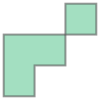

In [158]:
from shapely.geometry import Polygon
from shapely.ops import unary_union

def calculate_number_of_sides(garden_regions):
    side_counter = {}
    for plant_type, regions in garden_regions.items():
        side_counter[plant_type] = []
        for region in regions:
            # Create a polygon from the region coordinates
            polygon = create_unioned_polygon(region)
            num_sides = calculate_sides_outer_perimeter(polygon)
            num_sides += calculate_sides_inner_perimeter(polygon)
            side_counter[plant_type].append(num_sides)
    return side_counter


def create_unioned_polygon(coordinates):
    # Create a list to store all individual square polygons
    polygons = []

    for x, y in coordinates:
        # Create a square centered at each (x, y)
        square = Polygon(
            [
                (x - 0.5, y - 0.5),
                (x + 0.5, y - 0.5),
                (x + 0.5, y + 0.5),
                (x - 0.5, y + 0.5),
            ]
        )
        polygons.append(square)

    # Union all squares to form a single polygon
    unioned_polygon = unary_union(polygons).normalize().simplify(0.4, True)

    return unioned_polygon

def calculate_sides_outer_perimeter(unioned_polygon):
    # Calculate the exterior perimeter of the unioned polygon
    return len(unioned_polygon.exterior.coords) - 1

def calculate_sides_inner_perimeter(unioned_polygon):
    sides = 0
    for interior in unioned_polygon.interiors:
        # Calculate the number of sides of this interior ring
        sides += len(interior.coords) - 1
    return sides

def get_total_costs(areas, perimeters):
    total_cost = 0
    for plant_type in areas:
        for area, perimeter in zip(areas[plant_type], perimeters[plant_type]):
            total_cost += area * perimeter
    return total_cost

# Example usage
coordinates = [(1, 1), (1, 2), (2, 2), (3, 3)]
create_unioned_polygon(coordinates)

In [159]:
garden_regions = find_regions(parse_map(example))
areas = calculate_areas(garden_regions)
perimeters = calculate_number_of_sides(garden_regions)
get_total_costs(areas, perimeters)

1206

In [160]:
with open('./data/Day 12/input.txt') as f:
    map_grid = f.read()
garden_regions = find_regions(parse_map(map_grid))
areas = calculate_areas(garden_regions)
perimeters = calculate_number_of_sides(garden_regions)
get_total_costs(areas, perimeters)

830516